In [1]:
import pandas as pd
import numpy as np

file_name = '../HashtagNetwork/allseason_20k_rawdata.json'


df = pd.read_json(file_name)

In [2]:
base_df = df[['id','hashtags']]

In [3]:
base_df.head()

id                                           hashtags
0  BtOm-dkHn5v  [sport, travelling, winterfashion, cestovani, ...
1  BtQp-IfHkzq  [instagood, instastyle, fashionblog, fashionbl...
2  BtRdH3UBQ6i  [london, like4like, corduroy, beanie, ootd, uk...
3  BtRJG92g_CG                                                 []
4  BtOpNQpApMI  [styleover50, chiberia, styleisforlife, thrift...

In [4]:
base_df.index = base_df['id']

In [5]:
base_df = base_df.drop(columns='id')

In [6]:
fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']

In [7]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, BtOm-dkHn5v to BtCTPK7AJlC
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 275.7+ KB


In [8]:
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

In [9]:
def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(
        0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
        
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

In [10]:
tag_df = list(fashion_df['hashtags'])
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))
    
fashion_df['hashtags'] = tag_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
fashion_dict = getTagsDict(fashion_df)

In [17]:
fashion_dict[-300:]

[('winterishere', 139),
 ('affordablefashion', 139),
 ('skirt', 139),
 ('hat', 142),
 ('elegant', 142),
 ('aboutalook', 142),
 ('whattowear', 142),
 ('vacation', 143),
 ('personalstyle', 143),
 ('repost', 143),
 ('photo', 143),
 ('mylook', 144),
 ('onlinestore', 144),
 ('goodvibes', 144),
 ('jewelrylovers', 144),
 ('vogue', 145),
 ('ltkunder50', 146),
 ('styling', 147),
 ('getthelook', 147),
 ('atlanta', 148),
 ('stylediaries', 149),
 ('etsy', 149),
 ('lotd', 150),
 ('fashioninspiration', 150),
 ('flowers', 151),
 ('zara', 151),
 ('jewelryforsale', 152),
 ('shopnow', 153),
 ('swimsuit', 153),
 ('portrait', 154),
 ('wintertime', 155),
 ('bossbabe', 155),
 ('details', 157),
 ('supportsmallbusiness', 157),
 ('onlineshop', 157),
 ('uk', 157),
 ('tops', 158),
 ('fashionkilla', 159),
 ('sunshine', 159),
 ('winter2019', 160),
 ('weship', 160),
 ('etsyshop', 160),
 ('fashioninsta', 161),
 ('womensstyle', 161),
 ('australia', 161),
 ('postoftheday', 162),
 ('beachlife', 162),
 ('vintageclothing

# Remove HF Tags

In [23]:
# 삭제할 태그 : fashion style ootd(outfitoftheday) shopping fashionista
# 처음 시도이기에 조금만 삭제해 봅니다.
for tag in fashion_dict:
    if tag[0] == 'fashion' or tag[0] == 'style' or tag[0] == 'ootd' or tag[0] == 'outfitoftheday' or tag[0] == 'shopping' or tag[0] == 'fashionista': 
        fashion_dict.remove(tag)

In [24]:
fashion_dict200 = fashion_dict[-1000:]

In [25]:
fashion_dict200

[('teenfashion', 43),
 ('dontmissout', 43),
 ('leopard', 43),
 ('colourful', 43),
 ('instafollow', 43),
 ('curvywomen', 43),
 ('newin', 43),
 ('izmir', 43),
 ('beachvibes', 43),
 ('1950sfashion', 43),
 ('australiandesigner', 43),
 ('home', 44),
 ('summerwear', 44),
 ('hijabstyle', 44),
 ('natural', 44),
 ('suit', 44),
 ('mumbaifashion', 44),
 ('shoelover', 44),
 ('lookdodia', 44),
 ('jeanscollic', 44),
 ('yeezus', 44),
 ('kuveyt', 44),
 ('tankini', 44),
 ('classicstyle', 45),
 ('scarves', 45),
 ('ootdgals', 45),
 ('workout', 45),
 ('anastasiabeverlyhills', 45),
 ('dressup', 45),
 ('dammam', 45),
 ('vibes', 45),
 ('fendi', 45),
 ('instagramers', 45),
 ('unisexclothing', 45),
 ('cali', 45),
 ('cardib', 45),
 ('internationalshipping', 45),
 ('gamis', 45),
 ('springsummer2019', 45),
 ('blossom', 45),
 ('colddays', 46),
 ('modesty', 46),
 ('ecofriendly', 46),
 ('winterclothes', 46),
 ('canon', 46),
 ('consignment', 46),
 ('albania', 46),
 ('thehappynow', 46),
 ('pinterest', 46),
 ('womenwit

In [26]:
fashion_top200 = []
for i in fashion_dict200:
    fashion_top200.append(i[0])

In [27]:
before_corr200 = get_DataFrame_for_affinity(fashion_df,fashion_top200)

In [28]:
before_corr200

teenfashion  dontmissout  leopard  colourful  instafollow  curvywomen  \
0                0            0        0          0            0           0   
1                0            0        0          0            0           0   
2                0            0        0          0            0           0   
3                0            0        0          0            0           0   
4                0            0        0          0            0           0   
5                0            0        0          0            0           0   
6                0            0        0          0            0           0   
7                0            0        0          0            0           0   
8                0            0        0          0            0           0   
9                0            0        0          0            0           0   
10               0            0        0          0            0           0   
11               0            0        0          0            0           0   
12               0            0        0          0            0           0   
13               0            0        0          0            0           0   
14               0            0        0          0            0           0   
15               0            0        0          0            0           0   
16               0            0        0          0            0           0   
17               0            0        0          0            0           0   
18               0            0        0          0            0           0   
19               0            0        0          0            0           0   
20               0            0        0          0            0           0   
21               0            0        0          0            0           0   
22               0            0        0          0            0           0   
23               0            0        0          0            0           0   
24               0            0        0          0            0           0   
25               0            0        0          0            0           0   
26               0            0        0          0            0           0   
27               0            0        0          0            0           0   
28               0            0        0          0            0           0   
29               0            0        0          0            0           0   
...            ...          ...      ...        ...          ...         ...   
17614            0            0        0          0            0           0   
17615            0            0        0          0            0           0   
17616            0            0        0          0            0           0   
17617            0            0        0          0            0           0   
17618            0            0        0          0            0           0   
17619            0            0        0          0            0           0   
17620            0            0        0          0            0           0   
17621            0            0        0          0            0           0   
17622            0            0        0          0            0           0   
17623            1            0        0          0            0           0   
17624            0            0        0          0            0           0   
17625            0            0        0          0            0           0   
17626            0            0        0          0            0           0   
17627            0            0        0          0            0           0   
17628            0            0        0          0            0           0   
17629            0            0        0          0            0           0   
17630            0            0        0          0            0           0   
17631            0            0        0          0            0           0   
17632  

In [29]:
corr_affinity200 = before_corr200.corr(method = 'pearson')

In [30]:
corr_threshold200 = corr_affinity200.copy()

In [31]:
def addone_dividetwo(x):
    return pow((x+1)/2, 2)

In [32]:
corr_threshold200 = corr_threshold200.applymap(addone_dividetwo)

In [33]:
corr_threshold200

teenfashion  dontmissout   leopard  colourful  \
teenfashion               1.000000     0.248780  0.248780   0.248780   
dontmissout               0.248780     1.000000  0.248780   0.248780   
leopard                   0.248780     0.248780  1.000000   0.248780   
colourful                 0.248780     0.248780  0.248780   1.000000   
instafollow               0.248780     0.248780  0.248780   0.248780   
curvywomen                0.248780     0.570353  0.248780   0.248780   
newin                     0.248780     0.248780  0.248780   0.248780   
izmir                     0.248780     0.248780  0.248780   0.248780   
beachvibes                0.248780     0.248780  0.248780   0.248780   
1950sfashion              0.248780     0.248780  0.248780   0.248780   
australiandesigner        0.248780     0.248780  0.248780   0.407879   
home                      0.248766     0.248766  0.248766   0.248766   
summerwear                0.260394     0.248766  0.248766   0.405827   
hijabstyle                0.248766     0.248766  0.248766   0.248766   
natural                   0.248766     0.248766  0.248766   0.248766   
suit                      0.248766     0.248766  0.248766   0.248766   
mumbaifashion             0.248766     0.248766  0.248766   0.248766   
shoelover                 0.248766     0.248766  0.272287   0.248766   
lookdodia                 0.248766     0.248766  0.248766   0.248766   
jeanscollic               0.248766     0.248766  0.248766   0.248766   
yeezus                    0.248766     0.248766  0.248766   0.248766   
kuveyt                    0.248766     0.248766  0.248766   0.248766   
tankini                   0.248766     0.248766  0.248766   0.248766   
classicstyle              0.248752     0.248752  0.248752   0.248752   
scarves                   0.248752     0.248752  0.248752   0.260248   
ootdgals                  0.248752     0.248752  0.248752   0.248752   
workout                   0.248752     0.248752  0.248752   0.248752   
anastasiabeverlyhills     0.248752     0.248752  0.248752   0.248752   
dressup                   0.248752     0.248752  0.248752   0.248752   
dammam                    0.248752     0.248752  0.248752   0.248752   
...                            ...          ...       ...        ...   
outfit                    0.252210     0.244346  0.246954   0.293395   
shoplocal                 0.252210     0.260198  0.249575   0.249575   
styleinspo                0.246944     0.246944  0.254841   0.246944   
fashionable               0.249477     0.244293  0.249477   0.249477   
photography               0.246808     0.244244  0.244244   0.246808   
fashiongram               0.246767     0.244214  0.262361   0.283897   
fashionaddict             0.246758     0.244208  0.249321   0.244208   
model                     0.249210     0.244146  0.246671   0.244146   
spring                    0.243794     0.246189  0.258342   0.248596   
boutique                  0.248273     0.260147  0.260147   0.284728   
trendy                    0.255356     0.255356  0.250620   0.243598   
onlineboutique            0.243571     0.315338  0.245892   0.243571   
instastyle                0.250332     0.243451  0.264381   0.248028   
sale                      0.247975     0.311049  0.243419   0.243419   
instagood                 0.250150     0.252435  0.247875   0.250150   
stylish                   0.245170     0.258308  0.245170   0.243013   
styleblogger              0.249444     0.242976  0.251619   0.242976   
love                      0.245119     0.242974  0.249439   0.245119   
summer                    0.244925     0.291246  0.251297   0.244925   
fashionpost               0.244852     0.251180  0.249062   0.242761   
streetstyle               0.248518     0.242446  0.250559   0.248518   
onlineshopping            0.242341     0.288065  0.248344   0.242341   
womensfashion             0.254271     0.242278  0.250241   0.242278   
winter                    0.258158     0.254125  0.244180   0.2

# Clustering

In [34]:
from sklearn.cluster import SpectralClustering

sc200 = SpectralClustering(n_clusters = 50, affinity='precomputed')

In [35]:
labels = sc200.fit_predict(corr_threshold200)

In [36]:
predict200 = pd.DataFrame(labels)

In [37]:
predict200.columns = ['Group']

In [38]:
predict200

Group
0       48
1       45
2       48
3       48
4       48
5       45
6       48
7       20
8       40
9       36
10      48
11      48
12      48
13      48
14      35
15       5
16      10
17      34
18      48
19      27
20      27
21      27
22       7
23      48
24      48
25      46
26      35
27      33
28      48
29      27
..     ...
970     46
971     22
972     38
973     49
974     12
975     49
976     38
977      1
978     48
979     22
980      9
981     22
982     38
983      9
984      4
985      9
986     38
987      4
988     40
989     49
990     46
991     22
992     22
993     12
994     49
995     49
996     35
997     40
998     22
999     12

[1000 rows x 1 columns]

In [39]:
node_df200 = pd.DataFrame(fashion_dict200, columns= ['Tag','Freq'])

In [40]:
node_df200['Group'] = predict200

In [41]:
node_df200

Tag  Freq  Group
0              teenfashion    43     48
1              dontmissout    43     45
2                  leopard    43     48
3                colourful    43     48
4              instafollow    43     48
5               curvywomen    43     45
6                    newin    43     48
7                    izmir    43     20
8               beachvibes    43     40
9             1950sfashion    43     36
10      australiandesigner    43     48
11                    home    44     48
12              summerwear    44     48
13              hijabstyle    44     48
14                 natural    44     35
15                    suit    44      5
16           mumbaifashion    44     10
17               shoelover    44     34
18               lookdodia    44     48
19             jeanscollic    44     27
20                  yeezus    44     27
21                  kuveyt    44     27
22                 tankini    44      7
23            classicstyle    45     48
24                 scarves    45     48
25                ootdgals    45     46
26                 workout    45     35
27   anastasiabeverlyhills    45     33
28                 dressup    45     48
29                  dammam    45     27
..                     ...   ...    ...
970                 outfit   887     46
971              shoplocal   887     22
972             styleinspo   889     38
973            fashionable   903     49
974            photography   918     12
975            fashiongram   927     49
976          fashionaddict   929     38
977                  model   948      1
978                 spring  1059     48
979               boutique  1122     22
980                 trendy  1123      9
981         onlineboutique  1132     22
982             instastyle  1172     38
983                   sale  1183      9
984              instagood  1204      4
985                stylish  1323      9
986           styleblogger  1336     38
987                   love  1337      4
988                 summer  1392     40
989            fashionpost  1413     49
990            streetstyle  1529     46
991         onlineshopping  1568     22
992          womensfashion  1592     22
993                 winter  1616     12
994           instafashion  2587     49
995         fashionblogger  3139     49
996            fallfashion  4400     35
997          summerfashion  4822     40
998          springfashion  4845     22
999          winterfashion  6016     12

[1000 rows x 3 columns]

In [42]:
node_df200 = node_df200.sort_values(['Group'],ascending=True)
groupby_tags200 = node_df200.groupby('Group')['Tag'].apply(list)


In [43]:
for list in groupby_tags200:
    print(list)
    print()

['summer2019', 'bbw', 'trending', 'fit', 'women', 'trends', 'instagram', 'sunshine', 'womensstyle', 'fashion2019', 'shopwithsenior', 'fitness', 'sexy', 'womensfitness', 'fashions', 'gorgeous']

['bohemian', 'pinterest', 'boho', 'editorial', 'bohofashion', 'model', 'bohochic', 'bohostyle', 'afterpay', 'influencer', 'stylist', 'blogger', 'freeshipping', 'trend', 'cotton', 'linen']

['losangeles', 'cali', 'nyc', 'florida', 'miami', 'tokyo', 'dubaifashion', 'londonfashion', 'atlanta', 'newyork', 'glamour', 'fashioninsta', 'paris', 'london']

['onsale', 'sales', 'bagaddict', 'bagaholic', 'bagshop', 'bagsale', 'australia', 'usa', 'uk']

['repost', 'photooftheday', 'friends', 'love', 'cute', 'fun', 'like4like', 'family', 'follow', 'nature', 'instagood', 'smile', 'beautiful', 'picoftheday', 'likeforlike', 'instadaily', 'me', 'art', 'instalike', 'selfie', 'tbt', 'happy', 'followme', 'girl']

['ootdmen', 'gqstyle', 'adidas', 'fashionmen', 'urbanstyle', 'urbanfashion', 'menswear', 'suit', 'street

# Draw

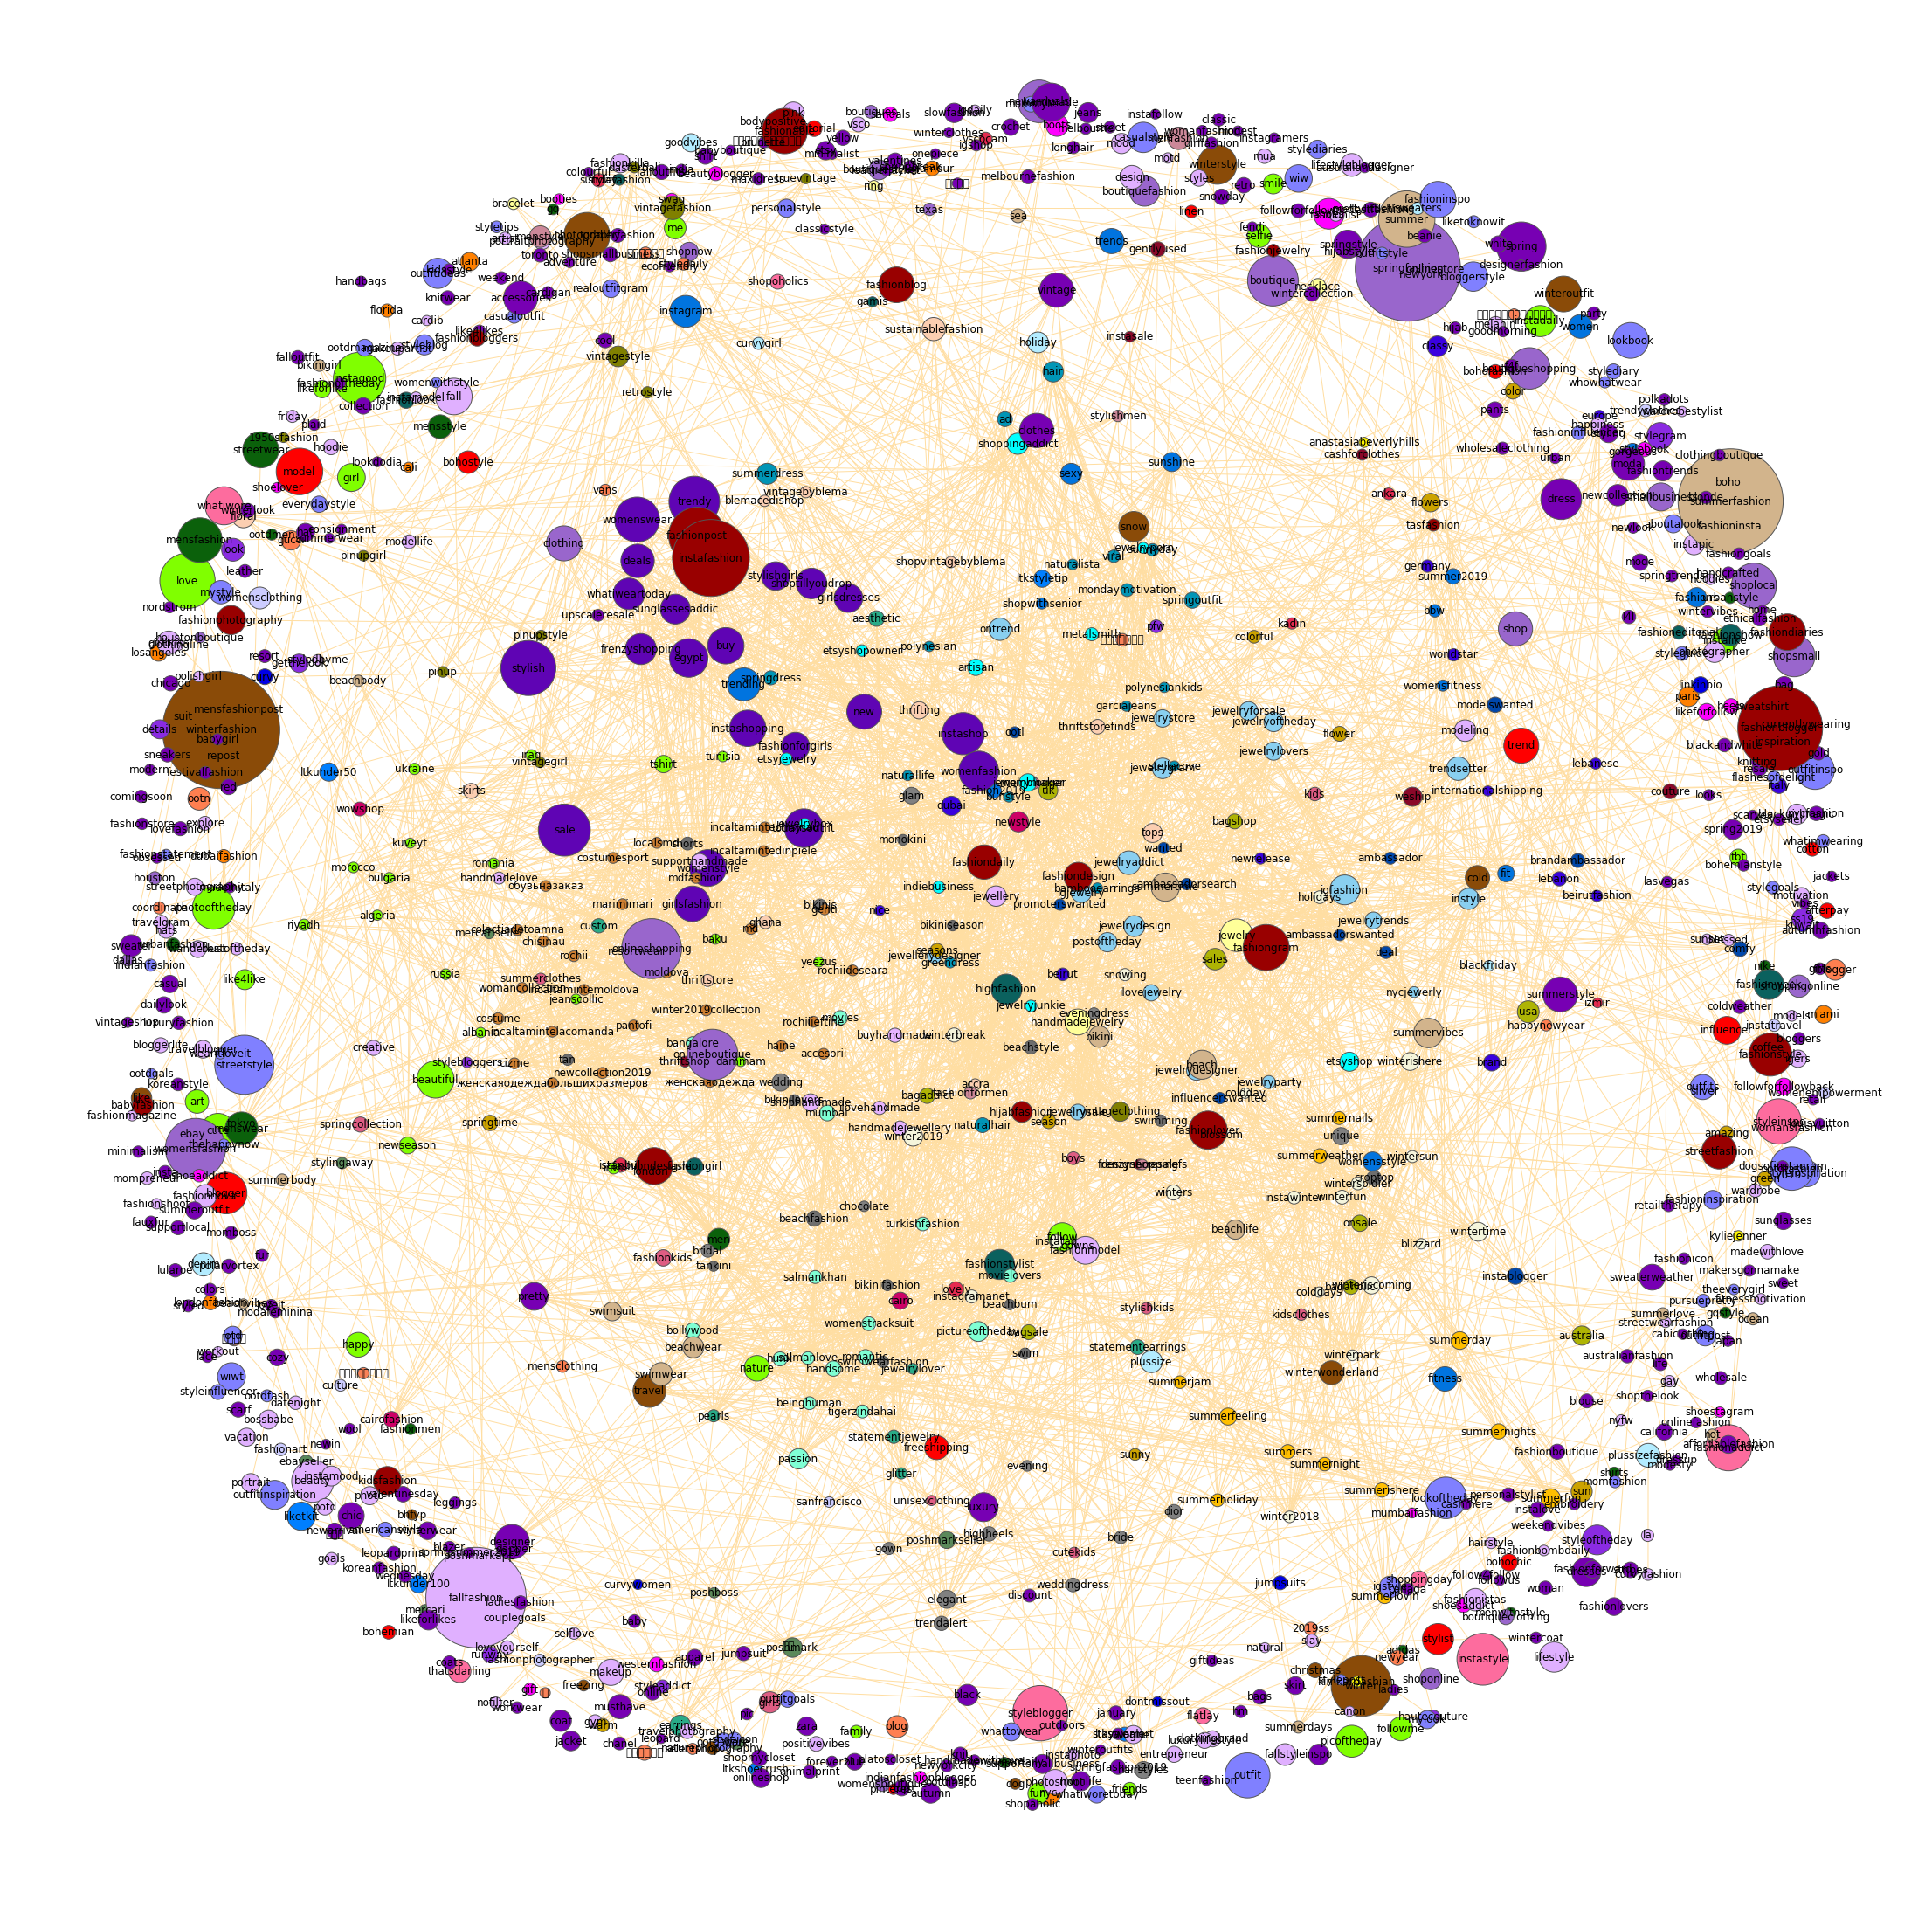

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

G = nx.Graph(day = "Stackoverflow")

for index,row in node_df200.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    
for index1,row1 in node_df200.iterrows():
    for index2,row2 in node_df200.iterrows():
        if row1['Tag'] == row2['Tag']:
            continue
        if corr_threshold200[row1['Tag']][row2['Tag']] > 0.4:
            G.add_edge(row1['Tag'],row2['Tag'],weight = corr_threshold200[row1['Tag']][row2['Tag']])


# corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
# i = 0
# for index1,row1 in node_df.iterrows():
#     for j in range(5):
#         try:
#             G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
#         except:
#             pass
# #             print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
#     i += 1

color_map = {1:'#FF0000', 2:'#FF8000', 3:'#AEB404', 4:'#80FF00', 5:'#0B610B', 6:'#0B615E',  
             7:'#6E6E6E', 0:'#0174DF', 8:'#3A01DF', 9:'#5F04B4', 10:'#FF00FF', 11:'#8A0829',
            12:'#8A4B08',13: '#FA8258' ,14:'#5B895A', 15:'#FBCEB1', 16:'#7FFFD4', 17:'#007FFF', 18:'#89CFF0', 19:'#CD7F32',
             20:'#E52B50', 21:'#FFBF00', 22:'#9966CC', 23:'#F5F5DC', 24:'#0095B6', 25:'#8A2BE2', 26:'#DE5D83', 27:'#7FFF00', 28:'#0047AB',
             29:'#FF7F50', 30:'#00FFFF', 31:'#808080', 32:'#29AB87', 33:'#FFF700', 34:'#FF00FF', 35:'#E0B0FF', 36:'#808000', 37:'#CCCCFF',
            38:'#FD6C9E', 39:'#CC8899', 40:'#D2B48C', 41:'#ffff99', 42:'#cca300', 43:'#cc0066', 44:'#b3ecff', 45:'#0000e6',
            46:'#8080ff',47:'#e6b3ff',48:'#7700b3',49:'#990000',50:'#00cca3'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes,
        pos=nx.spring_layout(G, k=0.5, iterations=50), **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('13_1000tag_50cluster_fashion_style_ootd_shopping_fashionista')

# Silhouette scoring

In [44]:
from sklearn import metrics

In [45]:
X = np.array(corr_threshold200)
score = metrics.silhouette_score(X, labels, metric='euclidean')

In [46]:
# 1000tag 50cluster remove : fashion style ootd, shopping fashionista
print(round(score,4))

0.2106
